# Multiple Linear Regression

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.simplefilter("ignore")

## Reading the csv data

In [3]:
bikeRental = pd.read_csv('day.csv')
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the dataframe

In [4]:
bikeRental.shape

(730, 16)

In [5]:
bikeRental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- As observed, there are no null values in any of the columns

### Identifying categorical variables

#### Following are the categorical columns in the dataframe:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

#### Out of the above mentioned columns, we need to convert the following columns to their string categories and then to dummy variables
- season
- mnth
- weekday
- weathersit

In [7]:
# Converting season column into categorical string values
bikeRental[['season']] = bikeRental[['season']].apply(lambda x: x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Converting mnth column into categorical string values
months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
bikeRental[['mnth']] = bikeRental[['mnth']].apply(lambda x: x.map(months))
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Converting weekday column into categorical string values
weekday = {0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}
bikeRental[['weekday']] = bikeRental[['weekday']].apply(lambda x: x.map(weekday))
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Converting weathersit column into categorical string values
bikeRental[['weathersit']] = bikeRental[['weathersit']].apply(lambda x: x.map({1:"Clear", 2:"Mist", 3:"Light snow", 4:"Heavy Rain"}))
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1. Dropping the dteday column because we already have information of day from weekday 
### 2. Dropping the instant column because it is the record index 
### 3. Dropping casual and registered as cnt (target) is sum of both these columns

In [11]:
bikeRental = bikeRental.drop(['dteday', 'instant', 'casual', 'registered'], axis=1)
bikeRental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualisation of numeric columns

<Figure size 432x288 with 0 Axes>

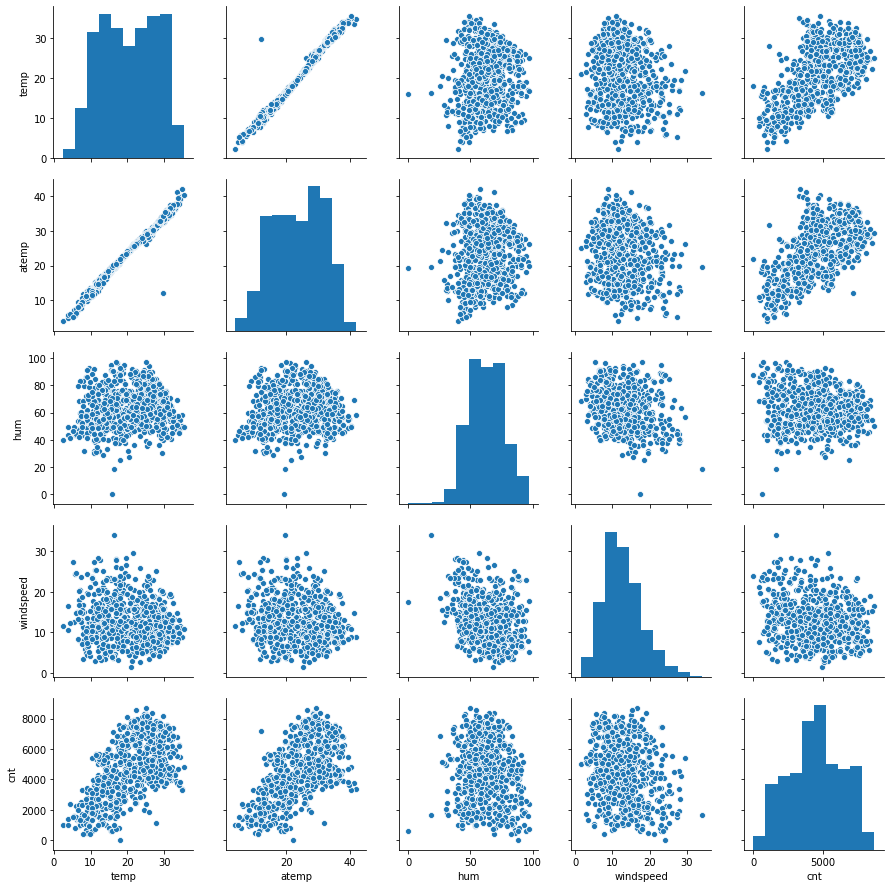

In [12]:
plt.figure()
sns.pairplot(bikeRental[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

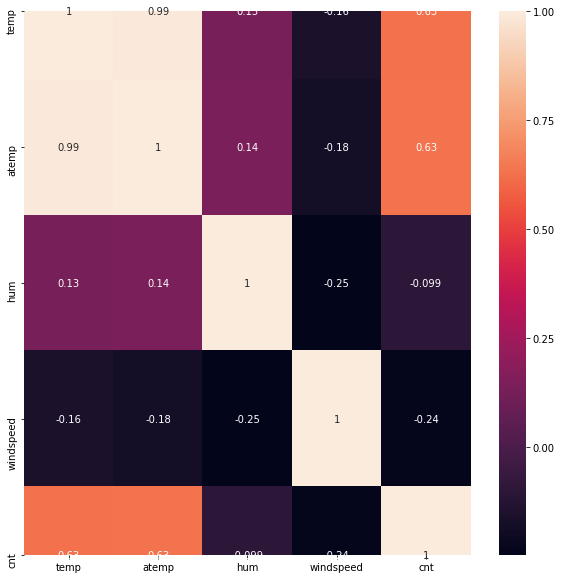

In [13]:
plt.figure(figsize=[10,10])
sns.heatmap(bikeRental[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True)
plt.show()

### As observed from above plot,
- temp has a somewhat positive linear with the target variable, cnt
- atemp also seems to have a positive linear relationship with cnt, but also has a very strong relationship with temp

### Clearly, we have some linear relationships, hence we can use multiple linear relationship on this dataset

## Visualising some categorical columns

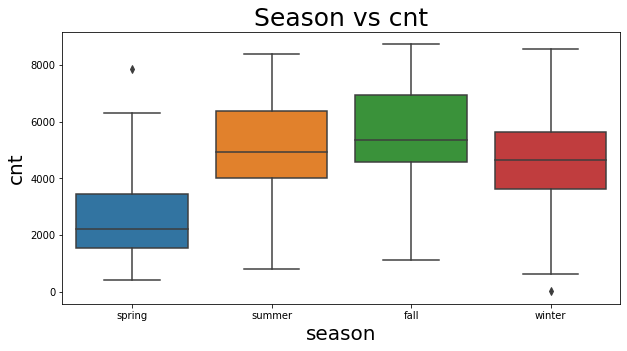

In [14]:
#season temp windspeed
plt.figure(figsize=[10,5])
plt.title('Season vs cnt', fontsize=25)
plt.xlabel('season', fontsize=20)
plt.ylabel('count of rental', fontsize=20)
sns.boxplot(x='season', y='cnt', data=bikeRental)
plt.show()

#### As observed from  the above plot, 
- bike rentals are significantly low during the season of spring
- It is highest in the month of fall

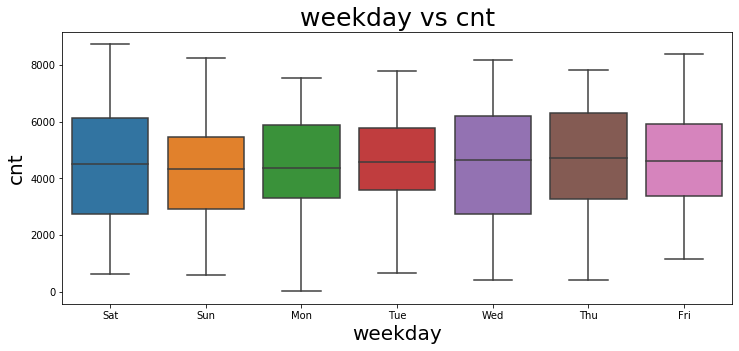

In [15]:
#weekday
plt.figure(figsize=[12,5])
plt.title('weekday vs cnt', fontsize=25)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('count of rental', fontsize=20)
sns.boxplot(x='weekday', y='cnt', data=bikeRental)
plt.show()

#### As observed from above plot, 
- Bike rentals are relatively low for the day - Monday, probably because most people are working after holiday on Sunday
- Bike rentals are significantly high for the weekends, Saturday and Sunday, and also for Wednesday
- Median is relative same for all days of the week. So this business is running all 7 days of week

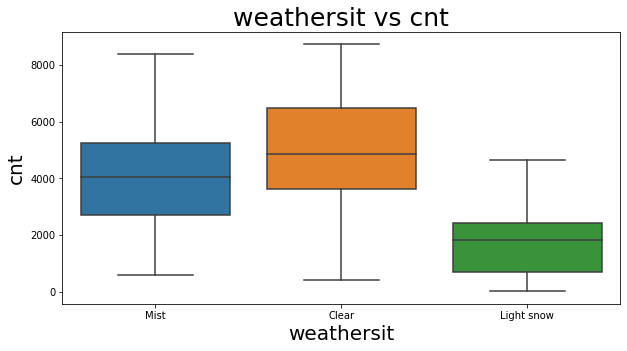

In [16]:
#weathersit
plt.figure(figsize=[10,5])
plt.title('weathersit vs cnt', fontsize=25)
plt.xlabel('weathersit', fontsize=20)
plt.ylabel('count of rental', fontsize=20)
sns.boxplot(x='weathersit', y='cnt', data=bikeRental)
plt.show()

#### As observed from above,
- Bike rentals is significantly low for weather conditions of light snow, which makes sense
- It is relatively high for clear weather as compared to Mist

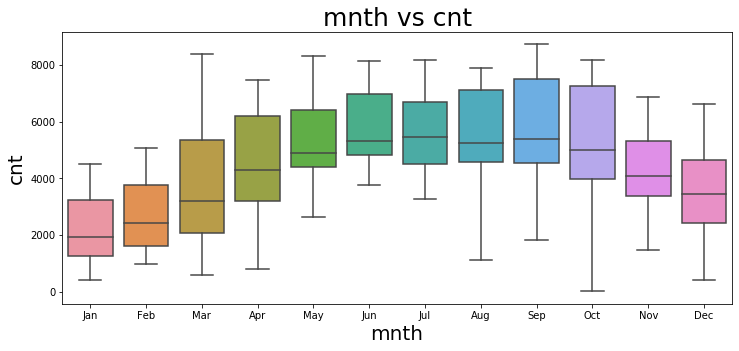

In [17]:
#mnth
plt.figure(figsize=[12,5])
plt.title('mnth vs cnt', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('count of rental', fontsize=20)
sns.boxplot(x='mnth', y='cnt', data=bikeRental)
plt.show()

#### As observed from above,
- Bike rentals is significantly high for the mid of the year, when the temp is high, which is also explained by positive correlation between temp and cnt

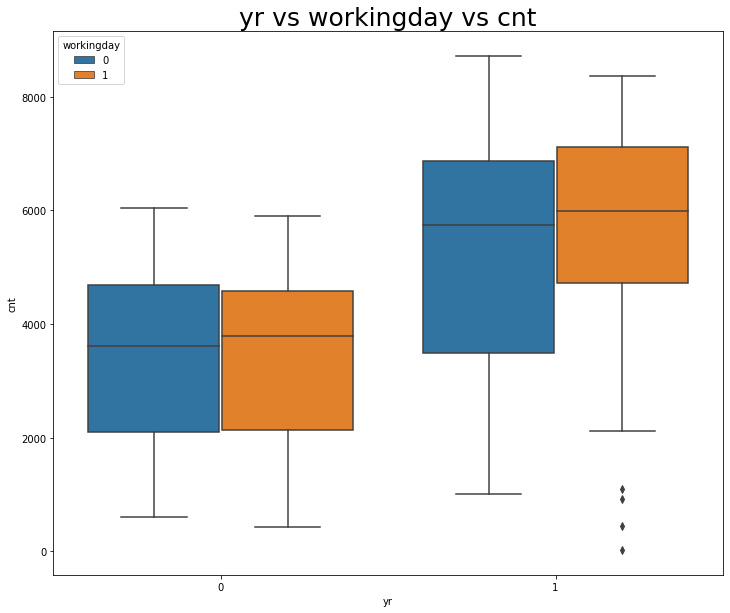

In [18]:
#weathersit
plt.figure(figsize=[12,10])
plt.title('yr vs workingday vs cnt', fontsize=25)
sns.boxplot(x = 'yr', y = 'cnt', hue = 'workingday', data=bikeRental)
plt.show()

#### As observed from above,
- Bike rentals have increased significantly for the year 1 (2019) as compared to year 2018. It might be beacuse more people are taking health seriously and want to exercise.
- The median of cnt of Bike rentals is reltively similar for working and non working days for both the years. But for 2019, the variations between 0 and 99percentile is higher for non working day as compared to working day.

## Data preparation

#### Adding dummy variables for the following columns:-
- season
- weekday
- mnth
- weathersit

In [19]:
bikeRental = pd.get_dummies(bikeRental, columns=['season'], drop_first = True)
bikeRental = pd.get_dummies(bikeRental, columns=['weekday'], drop_first = True)
bikeRental = pd.get_dummies(bikeRental, columns=['mnth'], drop_first = True)
bikeRental = pd.get_dummies(bikeRental, columns=['weathersit'], drop_first = True)
bikeRental.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


## Train-test split

In [20]:
#Splitting the dataframe to 70% train and 30% test
df_train, df_test = train_test_split(bikeRental, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Re-scaling train dataset using MinMaxScale

In [21]:
scaler = MinMaxScaler()
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
#Verifying the result
df_train[num_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


- As we can see, maximum value for all the numeric columns is 1 and minimum value is 0 

## Training the data

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

#### As observed from above result, we should start building our model with following predictors-
- yr
- holiday
- workingday
- temp
- hum
- windspeed
- season_spring
- season_summer
- season_winter
- weekday_Sat
- weekday_Sun
- mnth_Jul
- mnth_Sep
- weathersit_Light snow
- weathersit_Mist

In [26]:
predictorCols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 
                'season_summer', 'season_winter', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep', 
                'weathersit_Light snow', 'weathersit_Mist']
X_train = X_train[predictorCols]
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [27]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.11e-191
Time:                        17:04:56   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1995      0.028      7.200      0.000       0.145       0.254
yr                        0.2298      0.008     28.647      0.000       0.214       0.246
holiday                  -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                0.0837      0.010      8.665      0.000       0.065       0.103
temp                      0.5277      0.033     15.884      0.000       0.462       0.593
hum                      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer             0.0537      0.015      3.631      0.000       0.025       0.083
season_winter             0.0992      0.017      5.815      0.000       0.066       0.133
weekday_Sat               0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sun               0.0406      0.012      3.315      0.001       0.017       0.065
mnth_Jul                 -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                  0.0820      0.017      4.966      0.000       0.050       0.114
weathersit_Light snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.65e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables). For example - holiday
- We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

#### Checking VIF

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.68
9,weekday_Sat,12.20
10,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Mist,1.57


#### After investigating p-values and VIF, I have made following conclusions -
- holiday has significantly high p-value but low VIF
- working day has extremly high VIF and relatively high p-value
- weekday_Sat has a very high VIF and low p-value
- weekday_Sun has a very high VIF and low p-value

#### We choose to drop holiday

In [29]:
predictorCols.remove('holiday')
X_train = X_train[predictorCols]
X_train.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [30]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.11e-191
Time:                        17:04:56   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1811      0.042      4.301      0.000       0.098       0.264
yr                        0.2298      0.008     28.647      0.000       0.214       0.246
workingday                0.1021      0.025      4.024      0.000       0.052       0.152
temp                      0.5277      0.033     15.884      0.000       0.462       0.593
hum                      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer             0.0537      0.015      3.631      0.000       0.025       0.083
season_winter             0.0992      0.017      5.815      0.000       0.066       0.133
weekday_Sat               0.1121      0.027      4.181      0.000       0.059       0.165
weekday_Sun               0.0591      0.027      2.192      0.029       0.006       0.112
mnth_Jul                 -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                  0.0820      0.017      4.966      0.000       0.050       0.114
weathersit_Light snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [31]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
8,weekday_Sat,4.91
5,season_spring,4.80
9,weekday_Sun,4.76
7,season_winter,3.69
6,season_summer,3.04
13,weathersit_Mist,2.31


#### As observed from p-value and VIF above,
- hum has a low p-value but high VIF
- temp has a low p-value but high VIF
- workingday has a low p-value but high VIF

### So, we choose to drop hum

In [32]:
predictorCols.remove('hum')
X_train = X_train[predictorCols]
X_train.head()

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,1,0,0,0,0,1
111,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,1


In [33]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.28e-188
Time:                        17:04:56   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1008      0.038      2.624      0.009       0.025       0.176
yr                        0.2337      0.008     28.828      0.000       0.218       0.250
workingday                0.1029      0.026      3.983      0.000       0.052       0.154
temp                      0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring            -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer             0.0477      0.015      3.180      0.002       0.018       0.077
season_winter             0.0846      0.017      4.971      0.000       0.051       0.118
weekday_Sat               0.1146      0.027      4.201      0.000       0.061       0.168
weekday_Sun               0.0567      0.027      2.069      0.039       0.003       0.111
mnth_Jul                 -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                  0.0759      0.017      4.537      0.000       0.043       0.109
weathersit_Light snow    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Mist          -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
7,weekday_Sat,4.45
8,weekday_Sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
9,mnth_Jul,1.60


#### As observed from p-value and VIF above,
- workingday has a low p-value but high VIF
- temp has a low p-value but high VIF

### So, we choose to drop workingday

In [35]:
predictorCols.remove('workingday')
X_train = X_train[predictorCols]
X_train.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0
426,1,0.442393,0.255342,1,0,0,1,0,0,0,0,1
728,1,0.245101,0.663106,1,0,0,0,1,0,0,0,0
482,1,0.395666,0.188475,0,1,0,1,0,0,0,0,1
111,0,0.345824,0.380981,0,1,0,0,0,0,0,0,1


In [36]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.06e-186
Time:                        17:04:56   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2003      0.030      6.760      0.000       0.142       0.259
yr                        0.2342      0.008     28.467      0.000       0.218       0.250
temp                      0.4928      0.033     14.847      0.000       0.428       0.558
windspeed                -0.1513      0.025     -6.025      0.000      -0.201      -0.102
season_spring            -0.0681      0.021     -3.225      0.001      -0.110      -0.027
season_summer             0.0481      0.015      3.159      0.002       0.018       0.078
season_winter             0.0816      0.017      4.731      0.000       0.048       0.116
weekday_Sat               0.0157      0.011      1.370      0.171      -0.007       0.038
weekday_Sun              -0.0421      0.012     -3.548      0.000      -0.065      -0.019
mnth_Jul                 -0.0488      0.019     -2.618      0.009      -0.085      -0.012
mnth_Sep                  0.0723      0.017      4.264      0.000       0.039       0.106
weathersit_Light snow    -0.2848      0.025    -11.530      0.000      -0.333      -0.236
weathersit_Mist          -0.0802      0.009     -9.170      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
8,mnth_Jul,1.59
11,weathersit_Mist,1.55
9,mnth_Sep,1.33
6,weekday_Sat,1.22


#### As observed from p-value and VIF above,
- weekday_Sat has a high p-value but low VIF
- temp has a low p-value but high VIF

### So, we choose to drop weekday_Sat

In [38]:
predictorCols.remove('weekday_Sat')
X_train = X_train[predictorCols]
X_train.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,0.815169,0.264686,0,0,0,0,1,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1,0.245101,0.663106,1,0,0,1,0,0,0,0
482,1,0.395666,0.188475,0,1,0,0,0,0,0,1
111,0,0.345824,0.380981,0,1,0,0,0,0,0,1


In [39]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.37e-187
Time:                        17:04:57   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2034      0.030      6.877      0.000       0.145       0.261
yr                        0.2339      0.008     28.414      0.000       0.218       0.250
temp                      0.4917      0.033     14.805      0.000       0.426       0.557
windspeed                -0.1497      0.025     -5.963      0.000      -0.199      -0.100
season_spring            -0.0682      0.021     -3.227      0.001      -0.110      -0.027
season_summer             0.0479      0.015      3.145      0.002       0.018       0.078
season_winter             0.0818      0.017      4.739      0.000       0.048       0.116
weekday_Sun              -0.0450      0.012     -3.847      0.000      -0.068      -0.022
mnth_Jul                 -0.0483      0.019     -2.587      0.010      -0.085      -0.012
mnth_Sep                  0.0723      0.017      4.260      0.000       0.039       0.106
weathersit_Light snow    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
weathersit_Mist          -0.0802      0.009     -9.161      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
7,mnth_Jul,1.59
10,weathersit_Mist,1.55
8,mnth_Sep,1.33
6,weekday_Sun,1.17


#### As observed from p-value and VIF above,
- all predictors seem significant, with p-values below 0.05
- all predictors have a relatively low VIF, except for temp

#### Hence, removing temp and investigating the model

In [41]:
predictorCols.remove('temp')
X_train_1 = X_train[predictorCols]
X_train_1.head()

,yr,windspeed,season_spring,season_summer,season_winter,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist
576,1,0.264686,0,0,0,0,1,0,0,0
426,1,0.255342,1,0,0,0,0,0,0,1
728,1,0.663106,1,0,0,1,0,0,0,0
482,1,0.188475,0,1,0,0,0,0,0,1
111,0,0.380981,0,1,0,0,0,0,0,1


In [42]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train_1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.80e-149
Time:                        17:04:57   Log-Likelihood:                 406.20
No. Observations:                 510   AIC:                            -790.4
Df Residuals:                     499   BIC:                            -743.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5883      0.017     34.789      0.000       0.555       0.621
yr                        0.2475      0.010     25.243      0.000       0.228       0.267
windspeed                -0.1724      0.030     -5.739      0.000      -0.231      -0.113
season_spring            -0.3020      0.017    -17.931      0.000      -0.335      -0.269
season_summer            -0.0437      0.017     -2.617      0.009      -0.076      -0.011
season_winter            -0.0796      0.016     -4.958      0.000      -0.111      -0.048
weekday_Sun              -0.0452      0.014     -3.229      0.001      -0.073      -0.018
mnth_Jul                 -0.0088      0.022     -0.396      0.692      -0.052       0.035
mnth_Sep                  0.0681      0.020      3.345      0.001       0.028       0.108
weathersit_Light snow    -0.2963      0.030    -10.000      0.000      -0.354      -0.238
weathersit_Mist          -0.0895      0.010     -8.546      0.000      -0.110      -0.069
==============================================================================
Omnibus:                       36.933   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.312
Skew:                          -0.376   Prob(JB):                     1.10e-19
Kurtosis:                       4.882   Cond. No.                         9.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.82
2,season_spring,2.08
3,season_summer,2.03
0,yr,1.84
4,season_winter,1.75
9,weathersit_Mist,1.51
6,mnth_Jul,1.21
5,weekday_Sun,1.16
7,mnth_Sep,1.15
8,weathersit_Light snow,1.08


#### As observed, the R-squared of the model reduced significantly, when we removed temp, hence, getting temp back in model and removing windspeed (VIF = 4.6, from previous model with temp)

In [44]:
predictorCols.remove('windspeed')
predictorCols.append('temp')
X_train = X_train[predictorCols]
X_train.head()

,yr,season_spring,season_summer,season_winter,weekday_Sun,mnth_Jul,mnth_Sep,weathersit_Light snow,weathersit_Mist,temp
576,1,0,0,0,0,1,0,0,0,0.815169
426,1,1,0,0,0,0,0,0,1,0.442393
728,1,1,0,0,1,0,0,0,0,0.245101
482,1,0,1,0,0,0,0,0,1,0.395666
111,0,0,1,0,0,0,0,0,1,0.345824


In [45]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.80e-181
Time:                        17:04:57   Log-Likelihood:                 481.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1534      0.029      5.230      0.000       0.096       0.211
yr                        0.2329      0.009     27.370      0.000       0.216       0.250
season_spring            -0.0778      0.022     -3.571      0.000      -0.121      -0.035
season_summer             0.0379      0.016      2.424      0.016       0.007       0.069
season_winter             0.0829      0.018      4.644      0.000       0.048       0.118
weekday_Sun              -0.0449      0.012     -3.716      0.000      -0.069      -0.021
mnth_Jul                 -0.0485      0.019     -2.515      0.012      -0.086      -0.011
mnth_Sep                  0.0766      0.018      4.368      0.000       0.042       0.111
weathersit_Light snow    -0.2995      0.025    -11.772      0.000      -0.349      -0.249
weathersit_Mist          -0.0785      0.009     -8.668      0.000      -0.096      -0.061
temp                      0.5038      0.034     14.698      0.000       0.436       0.571
==============================================================================
Omnibus:                       76.738   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.882
Skew:                          -0.737   Prob(JB):                     2.66e-46
Kurtosis:                       5.775   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.27
0,yr,2.06
2,season_summer,1.95
3,season_winter,1.59
5,mnth_Jul,1.58
8,weathersit_Mist,1.55
1,season_spring,1.40
6,mnth_Sep,1.33
4,weekday_Sun,1.17
7,weathersit_Light snow,1.07


#### As observed from p-value and VIF above,
- All the predictors seem significant and have a low VIF

### By intuition, we can say that mnth_Jul is also explained by season, hence, we can drop that

In [47]:
predictorCols.remove('mnth_Jul')
X_train = X_train[predictorCols]
X_train.head()

,yr,season_spring,season_summer,season_winter,weekday_Sun,mnth_Sep,weathersit_Light snow,weathersit_Mist,temp
576,1,0,0,0,0,0,0,0,0.815169
426,1,1,0,0,0,0,0,1,0.442393
728,1,1,0,0,1,0,0,0,0.245101
482,1,0,1,0,0,0,0,1,0.395666
111,0,0,1,0,0,0,0,1,0.345824


In [48]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.07e-181
Time:                        17:04:57   Log-Likelihood:                 478.42
No. Observations:                 510   AIC:                            -936.8
Df Residuals:                     500   BIC:                            -894.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1455      0.029      4.964      0.000       0.088       0.203
yr                        0.2334      0.009     27.294      0.000       0.217       0.250
season_spring            -0.0668      0.021     -3.113      0.002      -0.109      -0.025
season_summer             0.0525      0.015      3.588      0.000       0.024       0.081
season_winter             0.0949      0.017      5.483      0.000       0.061       0.129
weekday_Sun              -0.0461      0.012     -3.794      0.000      -0.070      -0.022
mnth_Sep                  0.0898      0.017      5.337      0.000       0.057       0.123
weathersit_Light snow    -0.3004      0.026    -11.749      0.000      -0.351      -0.250
weathersit_Mist          -0.0772      0.009     -8.496      0.000      -0.095      -0.059
temp                      0.4915      0.034     14.410      0.000       0.424       0.559
==============================================================================
Omnibus:                       78.188   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.744
Skew:                          -0.762   Prob(JB):                     1.28e-45
Kurtosis:                       5.721   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,2.97
0,yr,2.06
2,season_summer,1.64
7,weathersit_Mist,1.55
3,season_winter,1.44
1,season_spring,1.33
5,mnth_Sep,1.22
4,weekday_Sun,1.17
6,weathersit_Light snow,1.07


#### As observed from p-value and VIF above,
- All the predictors seem significant and have a low VIF

### By intuition, we can say that mnth_Sep is also explained by season, hence, we can drop that

In [50]:
predictorCols.remove('mnth_Sep')
X_train = X_train[predictorCols]
X_train.head()

,yr,season_spring,season_summer,season_winter,weekday_Sun,weathersit_Light snow,weathersit_Mist,temp
576,1,0,0,0,0,0,0,0.815169
426,1,1,0,0,0,0,1,0.442393
728,1,1,0,0,1,0,0,0.245101
482,1,0,1,0,0,0,1,0.395666
111,0,0,1,0,0,0,1,0.345824


In [51]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     269.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.73e-176
Time:                        17:04:57   Log-Likelihood:                 464.29
No. Observations:                 510   AIC:                            -910.6
Df Residuals:                     501   BIC:                            -872.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1749      0.030      5.916      0.000       0.117       0.233
yr                        0.2333      0.009     26.561      0.000       0.216       0.251
season_spring            -0.0940      0.021     -4.391      0.000      -0.136      -0.052
season_summer             0.0284      0.014      1.985      0.048       0.000       0.056
season_winter             0.0755      0.017      4.344      0.000       0.041       0.110
weekday_Sun              -0.0479      0.012     -3.843      0.000      -0.072      -0.023
weathersit_Light snow    -0.2951      0.026    -11.246      0.000      -0.347      -0.244
weathersit_Mist          -0.0736      0.009     -7.911      0.000      -0.092      -0.055
temp                      0.4805      0.035     13.741      0.000       0.412       0.549
==============================================================================
Omnibus:                       75.164   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.345
Skew:                          -0.720   Prob(JB):                     9.45e-46
Kurtosis:                       5.772   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,2.67
0,yr,2.06
2,season_summer,1.53
6,weathersit_Mist,1.53
3,season_winter,1.43
1,season_spring,1.30
4,weekday_Sun,1.17
5,weathersit_Light snow,1.06


#### All the predictors seem significant, but season_summer has a p-value of 0.048
### Let's remove season_summer and try to build the model again to see how much R-squared changes

In [53]:
predictorCols.remove('season_summer')
X_train = X_train[predictorCols]
X_train.head()

,yr,season_spring,season_winter,weekday_Sun,weathersit_Light snow,weathersit_Mist,temp
576,1,0,0,0,0,0,0.815169
426,1,1,0,0,0,1,0.442393
728,1,1,0,1,0,0,0.245101
482,1,0,0,0,0,1,0.395666
111,0,0,0,0,0,1,0.345824


In [54]:
# Building the model again
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     305.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.85e-176
Time:                        17:04:57   Log-Likelihood:                 462.29
No. Observations:                 510   AIC:                            -908.6
Df Residuals:                     502   BIC:                            -874.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2132      0.023      9.473      0.000       0.169       0.257
yr                        0.2341      0.009     26.597      0.000       0.217       0.251
season_spring            -0.1221      0.016     -7.585      0.000      -0.154      -0.090
season_winter             0.0527      0.013      4.023      0.000       0.027       0.078
weekday_Sun              -0.0476      0.012     -3.806      0.000      -0.072      -0.023
weathersit_Light snow    -0.2964      0.026    -11.264      0.000      -0.348      -0.245
weathersit_Mist          -0.0733      0.009     -7.852      0.000      -0.092      -0.055
temp                      0.4446      0.030     14.812      0.000       0.386       0.504
==============================================================================
Omnibus:                       75.557   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.392
Skew:                          -0.720   Prob(JB):                     2.06e-46
Kurtosis:                       5.798   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,2.33
0,yr,2.04
5,weathersit_Mist,1.48
2,season_winter,1.29
1,season_spring,1.22
3,weekday_Sun,1.17
4,weathersit_Light snow,1.06


### All the predictors in the model now are statistically significant and have a low VIF. This is our final model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like. 

### Error terms should be normally distributed with mean equal to 0.

In [56]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

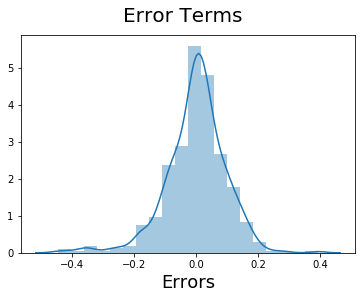

In [57]:
res = y_train - y_train_cnt
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Error terms should be independent of each other.

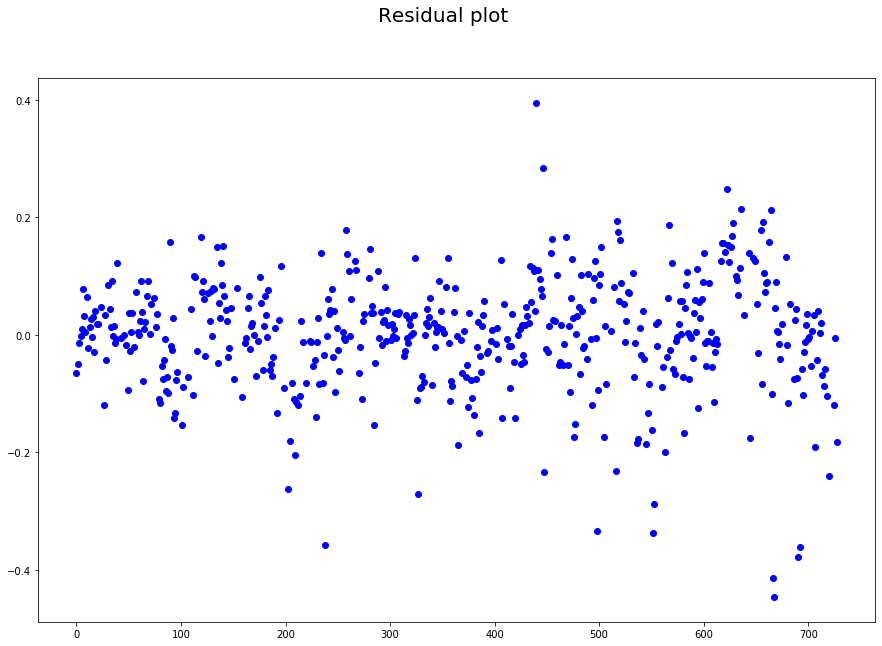

In [58]:
fig = plt.figure(figsize=[15,10])
fig.suptitle("Residual plot", fontsize=20)
plt.plot(res, 'bo')

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the finalmodel.

In [59]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light snow,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,1,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,0,0,0


In [60]:
df_test[num_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test[predictorCols]

In [62]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,yr,season_spring,season_winter,weekday_Sun,weathersit_Light snow,weathersit_Mist,temp
184,1.0,0,0,0,0,0,1,0.831783
535,1.0,1,0,0,0,0,0,0.901354
299,1.0,0,0,1,0,0,1,0.511964
221,1.0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,0.817246


In [63]:
y_pred = lr.predict(X_test_lm)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8036744766460399

# Final Model

### The final MLR model has a R-squared value of 81.0% on the train data and 80.3% r2_score on test data. Since these values are quite close to each other, we conclude that the model is significant. It has the following predictors:
- yr
- temp 
- season_spring
- season_winter
- weekday_Sun
- weathersit_Light snow
- weathersit_Mist

### Equation
cnt = 0.2132 + (0.2341)* yr + (0.4446)* temp + (-0.1221)* season_spring + (0.0527)* season_winter + (-0.0476)* weekday_Sun + (-0.2964)* weathersit_Light snow + (-0.0733)* weathersit_Mist		

#### From the above equation we can see that the predictors with descending order of their coefficients(without the sign) is as follows:-
1. Temp
2. weathersit_Light snow
3. Yr
4. Season_spring
5. weathersit_Mist
6. season_winter
7. weekday_Sun

The demand of shared bikes seems to be positively dependant upon the temperature of the day, i.e., higher the temperature, higher is the demand for bikes, which might probably be due to more people coming out from their houses at higher temperatures for exercise and hiring bikes for that.

The demand of bikes seems to have a negative relationship with the weather condition - Light snow which means that the weather condition, if of Light snow, the demand of bikes reduces, which makes sense.

The demand for shared bikes seems to have a positive relationship with the year of business. We have observed that the demand for shared bikes has increased significantly in the year 2019 as compared to the year 2018. This might be due to the fact that people in 2019 are more aware about the importance of health benefits of exercise and are hiring more bikes for that.

The demand for shared bikes seem to decrerase in the month of Spring. Maybe due to the fact that since the weather and temperature is pleasant in Spring, more people take vacations from work and the demand decreses.

The demand for shared bike seem to decrease if the weather conditions is misty, which makes sense beacuse the air is humid and people would the hiring of bikes

The demand for shared bikes seems to have a slightly positive relationship with winter. This may be due to the fact that although the temp is low but the weather is clear, so the demand of bikes slightly depend upon the winter season.

The demand for shared bikes seems to drop slightly when the day is Sunday. This might be explained by the fact that people tend to relax on holiday, i.e., Sunday and generally stay at homes with families.

# Thank you
#### Harnoor Singh